## Problem Statement
    In this assignment students need to predict whether a person makes over
    50K per year or not from classic adult dataset using XGBoost. The
    description of the dataset is as follows:
    Data Set Information:
    Extraction was done by Barry Becker from the 1994 Census
    database. A set of reasonably clean records was extracted using the
    following conditions: ((AAGE>16) && (AGI>100) &&
    (AFNLWGT>1)&& (HRSWK>0))

    Attribute Information:
    Listing of attributes: >50K, <=50K.
    age: continuous.
    workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
    Local-gov, State-gov, Without-pay, Never-worked.
    fnlwgt: continuous.
    education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
    Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
    Doctorate, 5th-6th, Preschool.
    education-num: continuous.

    marital-status: Married-civ-spouse, Divorced, Never-married,
    Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

    occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-
    managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,

    Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,
    Protective-serv, Armed-Forces.
    relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,
    Unmarried.
    race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    sex: Female, Male.
    capital-gain: continuous.
    capital-loss: continuous.
    hours-per-week: continuous.
    native-country: United-States, Cambodia, England, Puerto-Rico,
    Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,
    Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
    Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
    Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,

    Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
    Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

    Following is the code to load required libraries and data:


In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [119]:
print("Train Data Shape:",train_set.shape)
print("Test Data Shape: ", test_set.shape)

Train Data Shape: (32561, 15)
Test Data Shape:  (16281, 15)


In [120]:
train_set['wage_class']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: wage_class, Length: 32561, dtype: int64

In [121]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,4,77516,2,13,1,3,1,0,0,2174,0,40,0,0
1,50,1,83311,2,13,0,2,0,0,0,0,0,13,0,0
2,38,0,215646,0,9,2,9,1,0,0,0,0,40,0,0
3,53,0,234721,5,7,0,9,0,1,0,0,0,40,0,0
4,28,0,338409,2,13,0,0,4,1,1,0,0,40,9,0


In [122]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [123]:
test_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [124]:
# with open('adult.names','r') as file:
#     data = file.read()
# print(data)    

In [125]:
# Get info of data
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education_num   32561 non-null  int64
 5   marital_status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital_gain    32561 non-null  int64
 11  capital_loss    32561 non-null  int64
 12  hours_per_week  32561 non-null  int64
 13  native_country  32561 non-null  int64
 14  wage_class      32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [126]:
# Check null values in train set
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [127]:
# Checknig null values in test set
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

#### No null values found

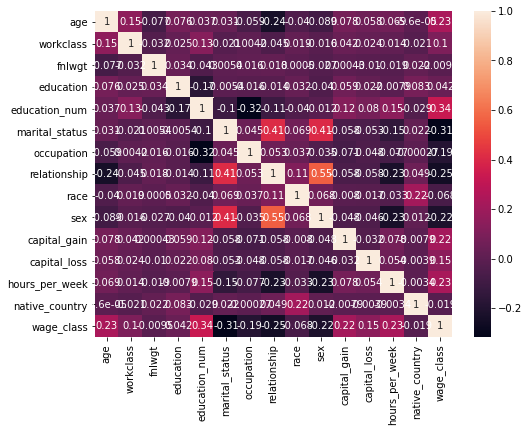

In [128]:
# Heatmap of correlation of data
plt.figure(figsize=(8,6))
sns.heatmap(train_set.corr(), annot=True)

In [129]:
def check_categorical_columns(df):
    for col in df.columns:
        if df[col].dtype=='object':
            print("------------",col,"---------------")
            print(train_set[col].value_counts())
#         print('-'*50)

In [130]:
# check for train_set
check_categorical_columns(train_set)

## Encoding categorical features

In [131]:
import category_encoders as ce
def custom_encoder(df):
    for col in df.columns:
        if df[col].dtype=='object':
            counts = df[col].value_counts()
            category_list = counts.to_frame().reset_index()['index'].to_list()
            encod_dict = {}
            for i, cat in enumerate(category_list):
                encod_dict[cat] = i
            print(encod_dict)                        
            encoder = ce.OrdinalEncoder(cols=[col], return_df=True, mapping=[{'col':col,'mapping':encod_dict}])
            df[col] = encoder.fit_transform(df[col])                            

In [132]:
# Encoding train set
custom_encoder(train_set)

In [133]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,4,77516,2,13,1,3,1,0,0,2174,0,40,0,0
1,50,1,83311,2,13,0,2,0,0,0,0,0,13,0,0
2,38,0,215646,0,9,2,9,1,0,0,0,0,40,0,0
3,53,0,234721,5,7,0,9,0,1,0,0,0,40,0,0
4,28,0,338409,2,13,0,0,4,1,1,0,0,40,9,0


In [134]:
# encoding test set
custom_encoder(test_set)

In [135]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,0,226802,5,7,1,6,2,1,0,0,0,40,0,0
1,38,0,89814,0,9,0,11,0,0,0,0,0,50,0,0
2,28,2,336951,6,12,0,12,0,0,0,0,0,40,0,1
3,44,0,160323,1,10,0,6,0,1,0,7688,0,40,0,1
4,18,3,103497,1,10,1,7,2,0,1,0,0,30,0,0


In [136]:
X_train,y_train = train_set.drop(['wage_class'], axis=1), train_set['wage_class']

In [137]:
X_test = test_set.drop(['wage_class'], axis=1)
y_test = test_set['wage_class']

In [138]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
xgb_clf.score(X_train,y_train)

0.9035349037191732

In [165]:
print("Train Score: ",xgb_clf.score(X_train, y_train))
print("Test Score: ",xgb_clf.score(X_test, y_test))
xgb_clf.score(X_test, y_test)

Train Score:  0.9035349037191732
Test Score:  0.8615564154535962


0.8615564154535962

## Implementing XGboost through best parameters

In [156]:
## implementing grid search to find best params
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':range(1,10),
          'learning_rate':[0.01,0.001, 0.05, 0.005],
          'booster':['gbtree','gblinear','dart'],
            
          'max_depth':range(1,7),
          'min_samples_split':range(1,5),
          'min_samples_leaf':range(1,5)
}

grid = GridSearchCV(XGBClassifier(),
                   param_grid=params,
                   cv=5,
                   verbose=1,
                   n_jobs=50)




In [157]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10368 candidates, totalling 51840 fits


[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:   18.3s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:   31.8s
[Parallel(n_jobs=50)]: Done 700 tasks      | elapsed:   45.2s
[Parallel(n_jobs=50)]: Done 1150 tasks      | elapsed:  1.1min
[Parallel(n_jobs=50)]: Done 1700 tasks      | elapsed:  1.6min
[Parallel(n_jobs=50)]: Done 2350 tasks      | elapsed:  2.2min
[Parallel(n_jobs=50)]: Done 3100 tasks      | elapsed:  3.0min
[Parallel(n_jobs=50)]: Done 3950 tasks      | elapsed:  4.2min
[Parallel(n_jobs=50)]: Done 4900 tasks      | elapsed:  5.0min
[Parallel(n_jobs=50)]: Done 5950 tasks      | elapsed:  5.8min
[Parallel(n_jobs=50)]: Done 7100 tasks      | elapsed:  6.8min
[Parallel(n_jobs=50)]: Done 8350 tasks      | elapsed:  8.3min
[Parallel(n_jobs=50)]: Done 9700 tasks      | elapsed:  9.4min
[Parallel(n_jobs=50)]: Done 11150 tasks      | elapsed: 10.6min
[Parallel(n_jobs=50)]: Done 12700 tasks    

[21:25:27] WARNING: ../src/learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [158]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, min_samples_leaf=1, min_samples_split=1,
              missing=nan, monotone_constraints='()', n_estimators=8, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [159]:
grid.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 1,
 'n_estimators': 8}

In [162]:
xgb_clf2 = grid.best_estimator_

In [163]:
xgb_clf2.fit(X_train, y_train)

[21:27:08] WARNING: ../src/learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, min_samples_leaf=1, min_samples_split=1,
              missing=nan, monotone_constraints='()', n_estimators=8, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [164]:
print("Train Score: ",xgb_clf2.score(X_train, y_train))
print("Test Score: ",xgb_clf2.score(X_test, y_test))

Train Score:  0.8566997328091889
Test Score:  0.8565812910754868


In [166]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, xgb_clf2.predict(X_test)))

Accuracy:  0.8565812910754868


In [ ]:
from sklearn import t